In [22]:
import lightkurve as lk
%matplotlib inline
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-22', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot(); 


In [23]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot() #LOAD THE TIME SERIES 

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

In [24]:
lc #This is the entire data 

<KeplerLightCurve length=64772 LABEL="KIC 10593626" QUARTER=17 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
       Time           float64     ...    float32        float32    
------------------ -------------- ... -------------- --------------
120.53900742435508  1.0000801e+00 ... -1.4607409e-03  3.5337068e-03
120.55944174409524  9.9997437e-01 ... -1.1929076e-03  3.6978703e-03
120.57987596383464  1.0000850e+00 ... -1.0024284e-03  3.5327603e-03
120.60031038356829  9.9982530e-01 ... -5.6158245e-04  3.3443142e-03
120.62074470325024  1.0000035e+00 ... -2.9510944e-04  3.3509261e-03
120.64117892293143  9.9993354e-01 ... -8.1684761e-05  2.9048885e-03
120.66161324260611  9.9991506e-01 ...  1.0091478e-04  3.1171264e-03
120.68204766223062  9.9997467e-01 ...  9.1682872e-05  2.9421994e-03
 120.7024818818536  1.0000194e+00 ...  7.8031801e-05  3.0023353e-03
               ...            ... ...            ...            ...
 1590.837992087574  9.9986059e-01 ...  1.7468176e-04  1.5448479e-02
 1590.858426291561  9.9981257e-01 ...  1.9556108e-04  1.5341706e-02
1590.8788605955851  9.9982544e-01 ...  2.5284167e-05  1.5430375e-02
1590.8992949996682  9.9985725e-01 ...  1.0342128e-04  1.5358978e-02
1590.9197292037716  9.9980638e-01 ...  2.3753807e-04  1.5454988e-02
 1590.940163607971  9.9989157e-01 ...  7.9966456e-05  1.5434193e-02
1590.9605979121989  9.9984617e-01 ...  1.6451752e-04  1.5386079e-02
1590.9810321164478  9.9980518e-01 ... -8.5767772e-04  1.4699463e-02
1591.0014665207927  9.9989669e-01 ...  6.9121459e-05  1.5342575e-02

In [25]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 80, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();
#Power vs Period 

In [26]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
bls.frequency_at_max_power
ax.set_xlim(-5, 5);

#Generate Time Series


In [27]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [28]:
"""import numpy as np
import matplotlib.pyplot as plt
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS

# Assume you have loaded your real data into `time` and `flux`
# Example: time = np.array([...]), flux = np.array([...])
flux = bls.flux.value  # Assuming these are NumPy arrays
time = bls.time.value

# Convert NumPy arrays to PyTorch tensors
time_tensor = torch.from_numpy(time).float()
flux_tensor = torch.from_numpy(flux).float()

# Define the model
def model(time, flux):
    # Priors for unknown parameters
    period = pyro.sample('period', dist.Uniform(0.5, 30))
    t0 = pyro.sample('t0', dist.Uniform(0, period))
    duration = pyro.sample('duration', dist.Uniform(0.01, 0.5))
    depth = pyro.sample('depth', dist.Uniform(0, 0.02))

    # Model for the transit light curve
    phase = ((time - t0 + 0.5 * period) % period) - 0.5 * period
    in_transit = (phase.abs() < (duration / 2)).float()
    expected_flux = 1 - depth * in_transit
    
    # Likelihood (assuming Gaussian noise)
    sigma = pyro.sample('sigma', dist.HalfNormal(0.001))
    with pyro.plate('data', len(time)):
        pyro.sample('obs', dist.Normal(expected_flux, sigma), obs=flux)

# Set up and run MCMC
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_samples=100, warmup_steps=30)
mcmc.run(time_tensor, flux_tensor)

# Print summary of MCMC results
mcmc.summary()"""

"import numpy as np\nimport matplotlib.pyplot as plt\nimport torch\nimport pyro\nimport pyro.distributions as dist\nfrom pyro.infer import MCMC, NUTS\n\n# Assume you have loaded your real data into `time` and `flux`\n# Example: time = np.array([...]), flux = np.array([...])\nflux = bls.flux.value  # Assuming these are NumPy arrays\ntime = bls.time.value\n\n# Convert NumPy arrays to PyTorch tensors\ntime_tensor = torch.from_numpy(time).float()\nflux_tensor = torch.from_numpy(flux).float()\n\n# Define the model\ndef model(time, flux):\n    # Priors for unknown parameters\n    period = pyro.sample('period', dist.Uniform(0.5, 30))\n    t0 = pyro.sample('t0', dist.Uniform(0, period))\n    duration = pyro.sample('duration', dist.Uniform(0.01, 0.5))\n    depth = pyro.sample('depth', dist.Uniform(0, 0.02))\n\n    # Model for the transit light curve\n    phase = ((time - t0 + 0.5 * period) % period) - 0.5 * period\n    in_transit = (phase.abs() < (duration / 2)).float()\n    expected_flux = 1 -

Running burn-in...


  0%|          | 0/500 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 500/500 [00:00<00:00, 1356.56it/s]


Running production...


100%|██████████| 10000/10000 [01:19<00:00, 126.50it/s]


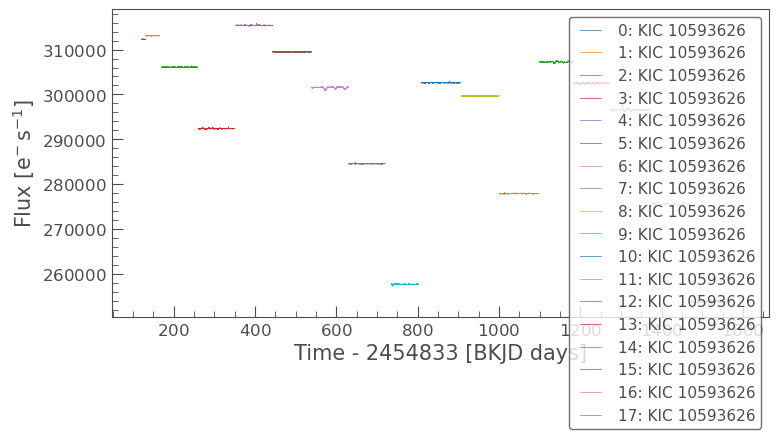

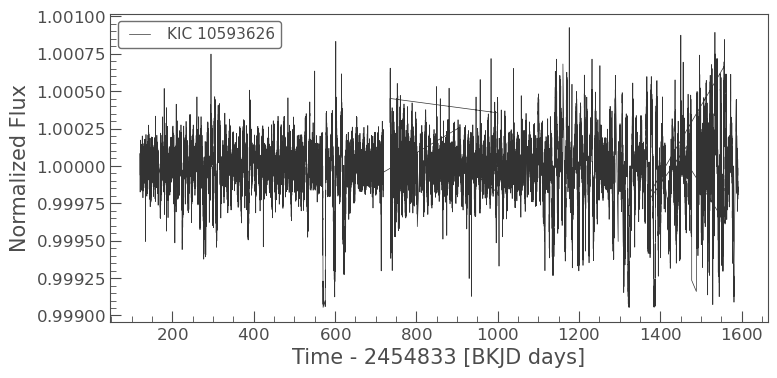

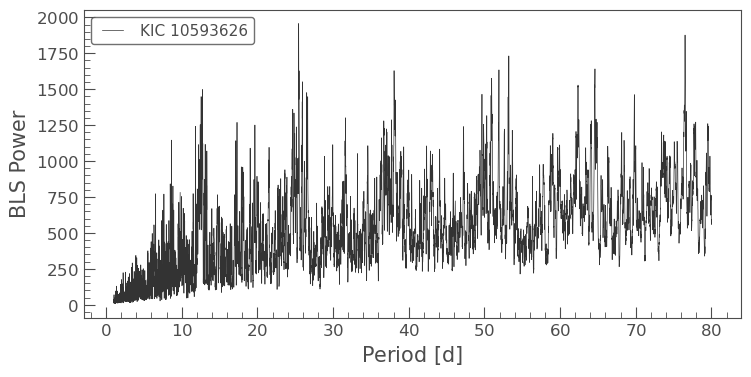

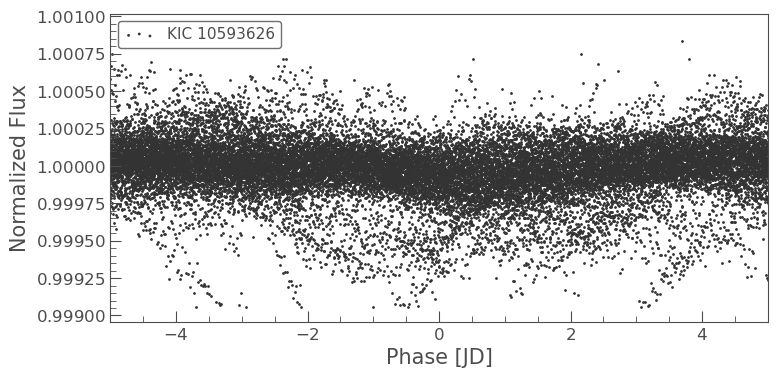

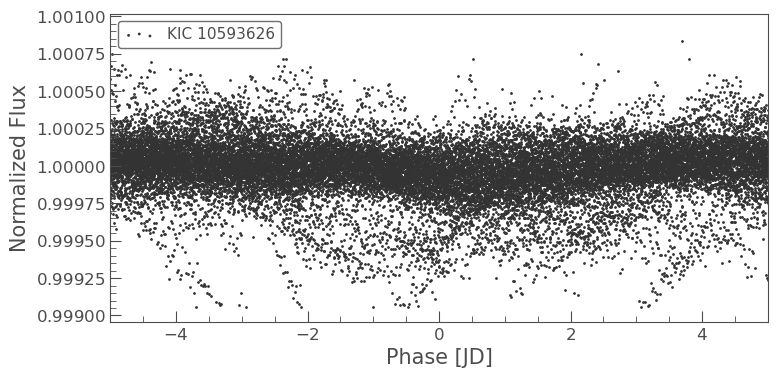

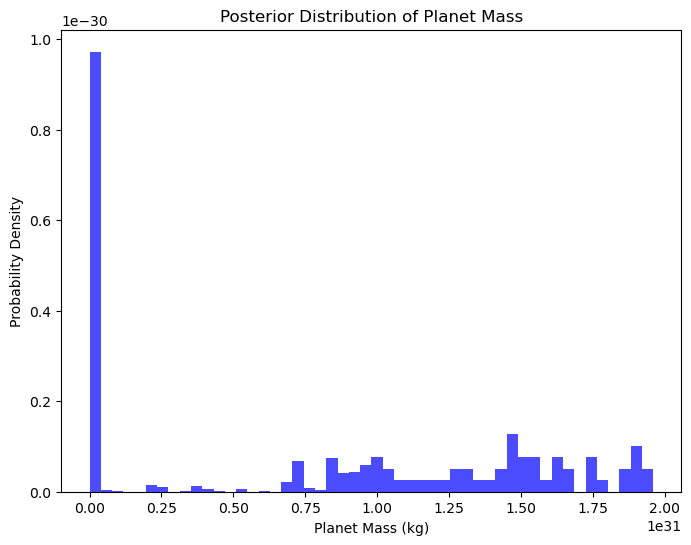

Estimated planet mass: 9.06e+30 kg ± 7.16e+30 kg


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Assuming you have these imported or defined elsewhere:
# `time_series` -> Time series data: a tuple (time, flux, flux_err)




# Example time-series data (replace with your actual data)
time = bls.time.value   # Time array
flux = bls.flux.value 
flux_err = lc["flux_err"].value

# Known parameters
period = 25.452945294529457  # Period of the planet in days
duration = 0.33  # Duration of the transit in days
depth = 0.0001074028110313094 # Depth of the transit


# Physical constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_sun = 1.989e30  # Solar mass, kg
R_sun = 6.957e8  # Solar radius, m

# Stellar parameters (replace with actual values if known)
M_star = 1.0 * M_sun  # Mass of the star in kg
R_star = 1.0 * R_sun  # Radius of the star in meters


# Transit model
def transit_model(time, period, duration, depth):
    """
    Simple box transit model: assumes flat-bottom transit.
    """
    phase = (time % period) / period
    in_transit = (phase < (duration / period) / 2) | (phase > (1 - (duration / period) / 2))
    model_flux = np.ones_like(time)
    model_flux[in_transit] -= depth
    return model_flux


# Likelihood function
def log_likelihood(params, time, flux, flux_err):
    Mp = params[0]  # Planet mass
    # Derived semi-major axis using Kepler's third law
    a = ((G * M_star * (period * 86400) ** 2) / (4 * np.pi ** 2)) ** (1 / 3)
    # Relation between mass and radius (optional improvement: use empirical MR relation)
    R_p = (Mp / M_sun) ** (1 / 3) * R_sun

    model_flux = transit_model(time, period, duration, depth)
    residuals = flux - model_flux
    return -0.5 * np.sum((residuals / flux_err) ** 2)


# Prior function
def log_prior(params):
    Mp = params[0]  # Planet mass
    if 0.00001 * M_sun < Mp < 0.01 * M_sun:  # Reasonable bounds for planet mass
        return 0.0
    return -np.inf


# Posterior function
def log_posterior(params, time, flux, flux_err):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, time, flux, flux_err)


# Initial guesses
initial_mass_guess = 1/33333333 * M_sun
nwalkers = 100
ndim = 1

# Spread initial positions randomly within a range (e.g., prior bounds)
initial_pos = np.random.uniform(
    low=0.1 * M_sun, high=10.0 * M_sun, size=(nwalkers, ndim)
)

# Set up MCMC sampler
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(time, flux, flux_err)
)

# Burn-in phase
print("Running burn-in...")
n_burn = 500
pos, prob, state = sampler.run_mcmc(initial_pos, n_burn, progress=True)

# Reset sampler and run production
print("Running production...")
sampler.reset()
n_steps = 10000
sampler.run_mcmc(pos, n_steps, progress=True)

# Analyze results
samples = sampler.get_chain(flat=True)
mass_samples = samples[:, 0]

# Plot the posterior distribution
plt.figure(figsize=(8, 6))
plt.hist(mass_samples, bins=50, density=True, alpha=0.7, color="blue")
plt.xlabel("Planet Mass (kg)")
plt.ylabel("Probability Density")
plt.title("Posterior Distribution of Planet Mass")
plt.show()

# Print summary statistics
mass_median = np.median(mass_samples)
mass_std = np.std(mass_samples)
print(f"Estimated planet mass: {mass_median:.2e} kg ± {mass_std:.2e} kg")

In [ ]:
g = print([i for i in mass_samples if i < 0.25*1e+31])

[5.946634966851124e+27, 7.662359720939369e+29, 1.6424477514514007e+28, 3.3717261537085917e+27, 2.3388935093717036e+30, 1.2206154683702284e+27, 2.274877010058109e+30, 1.9283163880233534e+28, 4.959243391609877e+29, 2.4733167272657666e+30, 6.450677430729429e+27, 1.5409210384853994e+28, 1.2387770803901964e+28, 8.699645688126524e+27, 3.695036806636213e+29, 1.3283874019253725e+28, 9.255648496896244e+27, 7.184350248727518e+29, 2.1262960582598075e+30, 1.0738122613561794e+30, 5.946634966851124e+27, 7.662359720939369e+29, 1.6424477514514007e+28, 3.3717261537085917e+27, 2.3388935093717036e+30, 1.2206154683702284e+27, 2.274877010058109e+30, 1.9283163880233534e+28, 4.959243391609877e+29, 2.4733167272657666e+30, 6.450677430729429e+27, 1.5409210384853994e+28, 1.2387770803901964e+28, 8.699645688126524e+27, 3.695036806636213e+29, 1.3283874019253725e+28, 9.255648496896244e+27, 7.184350248727518e+29, 2.1262960582598075e+30, 1.0738122613561794e+30, 5.946634966851124e+27, 7.662359720939369e+29, 1.642447751

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import batman
print(dir(batman))
import emcee

['TransitModel', 'TransitParams', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_custom_ld', '_eclipse', '_exponential_ld', '_logarithmic_ld', '_nonlinear_ld', '_power2_ld', '_quadratic_ld', '_rsky', '_uniform_ld', 'make_plots', 'openmp', 'plots', 'test', 'tests', 'transitmodel']


Running burn-in...


100%|██████████| 500/500 [00:15<00:00, 31.31it/s]


Running production...


100%|██████████| 2000/2000 [01:05<00:00, 30.54it/s]


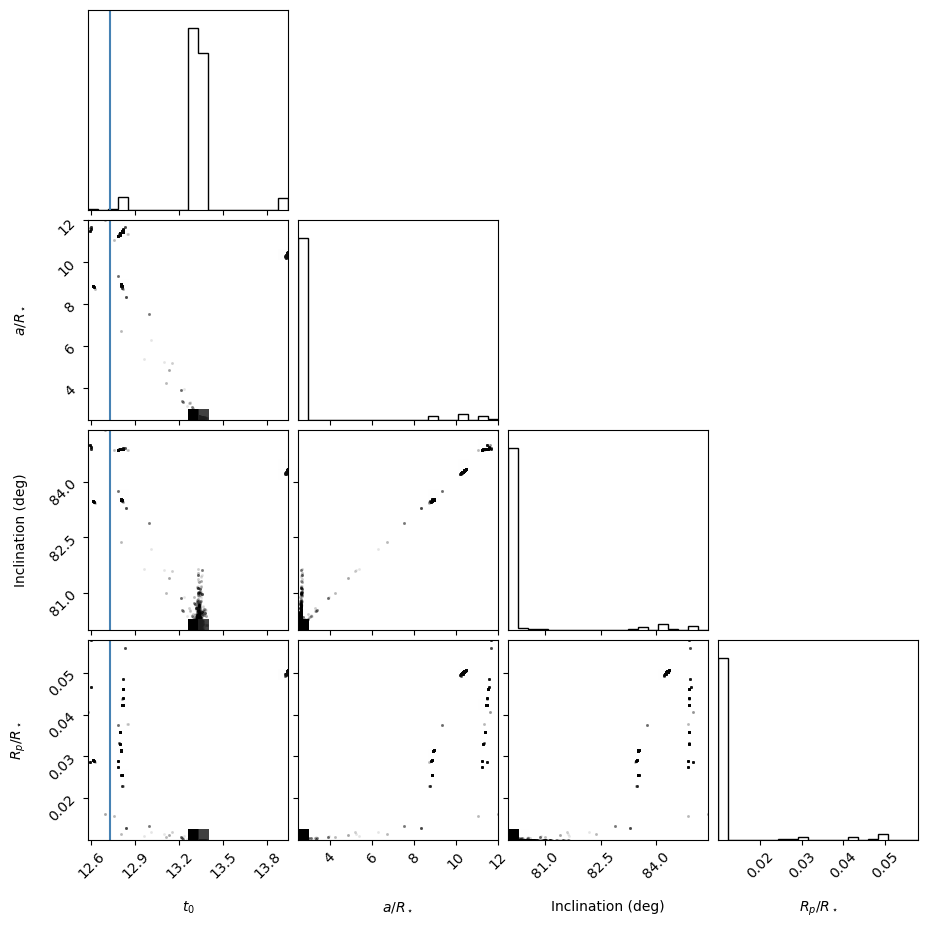

t0: 13.330 days
a/R_star: 2.498
Inclination: 80.023 degrees
R_p/R_star: 0.010


In [34]:


# Known constants and parameters
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_sun = 1.989e30  # Solar mass, kg
R_sun = 6.957e8  # Solar radius, m

# Known stellar parameters (replace with actual values)
M_star = 1.0 * M_sun  # Stellar mass, kg
R_star = 1.0 * R_sun  # Stellar radius, m

time = bls.time.value   # Time array
flux = bls.flux.value 
flux_err = lc["flux_err"].value

# Known parameters
period = 25.452945294529457  # Period of the planet in days
duration = 0.33  # Duration of the transit in days
depth = 0.0001074028110313094 # Depth of the transit


# Define the transit model using BATMAN
def create_transit_model(params, time):
    """Create a transit model with BATMAN."""
    t0, a_Rs, incl, Rp_Rs = params
    # Set up BATMAN parameters
    bm_params = batman.TransitParams()
    bm_params.t0 = t0  # Time of transit center
    bm_params.per = period  # Orbital period
    bm_params.rp = Rp_Rs  # Planet-to-star radius ratio
    bm_params.a = a_Rs  # Semi-major axis in units of stellar radius
    bm_params.inc = incl  # Orbital inclination in degrees
    bm_params.ecc = 0.0  # Eccentricity (assumed circular)
    bm_params.w = 90.0  # Argument of periastron (irrelevant for circular orbit)
    bm_params.u = [0.3, 0.3]  # Limb darkening coefficients (quadratic)
    bm_params.limb_dark = "quadratic"  # Limb darkening model

    # Create model
    m = batman.TransitModel(bm_params, time)
    return m.light_curve(bm_params)


# Log-likelihood function
def log_likelihood(params, time, flux, flux_err):
    t0, a_Rs, incl, Rp_Rs = params
    model_flux = create_transit_model(params, time)
    residuals = flux - model_flux
    return -0.5 * np.sum((residuals / flux_err) ** 2)


# Log-prior function
def log_prior(params):
    t0, a_Rs, incl, Rp_Rs = params
    # Priors for parameters
    if 0.0 < t0 < period and 1.0 < a_Rs < 50.0 and 80.0 < incl < 90.0 and 0.01 < Rp_Rs < 0.2:
        return 0.0
    return -np.inf


# Log-posterior function
def log_posterior(params, time, flux, flux_err):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, time, flux, flux_err)


# Initial guesses for MCMC
nwalkers = 32
ndim = 4
initial_pos = [
    [0.5 * period, 10.0, 85.0, 0.1] + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)
]

# Set up MCMC sampler
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(time, flux, flux_err)
)

# Burn-in phase
print("Running burn-in...")
n_burn = 500
pos, prob, state = sampler.run_mcmc(initial_pos, n_burn, progress=True)

# Reset sampler and run production
print("Running production...")
sampler.reset()
n_steps = 2000
sampler.run_mcmc(pos, n_steps, progress=True)

# Analyze results
samples = sampler.get_chain(flat=True)
t0_samples, a_Rs_samples, incl_samples, Rp_Rs_samples = samples.T

# Plot posterior distributions
import corner

labels = ["$t_0$", "$a/R_\\star$", "Inclination (deg)", "$R_p/R_\\star$"]
fig = corner.corner(samples, labels=labels, truths=[0.5 * period, None, 90.0, None])
plt.show()

# Summary statistics
t0_median = np.median(t0_samples)
a_Rs_median = np.median(a_Rs_samples)
incl_median = np.median(incl_samples)
Rp_Rs_median = np.median(Rp_Rs_samples)

print(f"t0: {t0_median:.3f} days")
print(f"a/R_star: {a_Rs_median:.3f}")
print(f"Inclination: {incl_median:.3f} degrees")
print(f"R_p/R_star: {Rp_Rs_median:.3f}")